In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import ParameterGrid, train_test_split
import seaborn as sns
from pickle import dump

In [2]:
total_data=pd.read_csv("../data/processed/final_data.csv")
total_data.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [3]:
robbery=total_data[total_data['crm_cd_desc'].isin([9,25])]

In [4]:
robbery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14255 entries, 12 to 320415
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_occ      14255 non-null  object 
 1   time_occ      14255 non-null  int64  
 2   area_name     14255 non-null  int64  
 3   crm_cd_desc   14255 non-null  int64  
 4   vict_age      14255 non-null  int64  
 5   vict_sex      14255 non-null  int64  
 6   vict_descent  14255 non-null  int64  
 7   premis_desc   14255 non-null  int64  
 8   weapon_desc   14255 non-null  int64  
 9   status_desc   14255 non-null  int64  
 10  location      14255 non-null  int64  
 11  lat           14255 non-null  float64
 12  lon           14255 non-null  float64
 13  weekday       14255 non-null  int64  
 14  month         14255 non-null  int64  
 15  mocodes_desc  14255 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 1.8+ MB


In [5]:
robbery=robbery[['lon','lat']]

In [6]:
X = robbery
X_train, X_test = train_test_split(X, test_size=0.2, random_state=14)

In [7]:
model = KMeans(n_clusters = 10,n_init="auto", random_state = 14)
model.fit(X_train)

KMeans(n_clusters=10, n_init='auto', random_state=14)

In [8]:
y_train = model.labels_

In [9]:
y_test = model.predict(X_test)

In [10]:
dat1 = X_train
dat1["cluster"] = y_train
dat2 = X_test
dat2["cluster"] = y_test


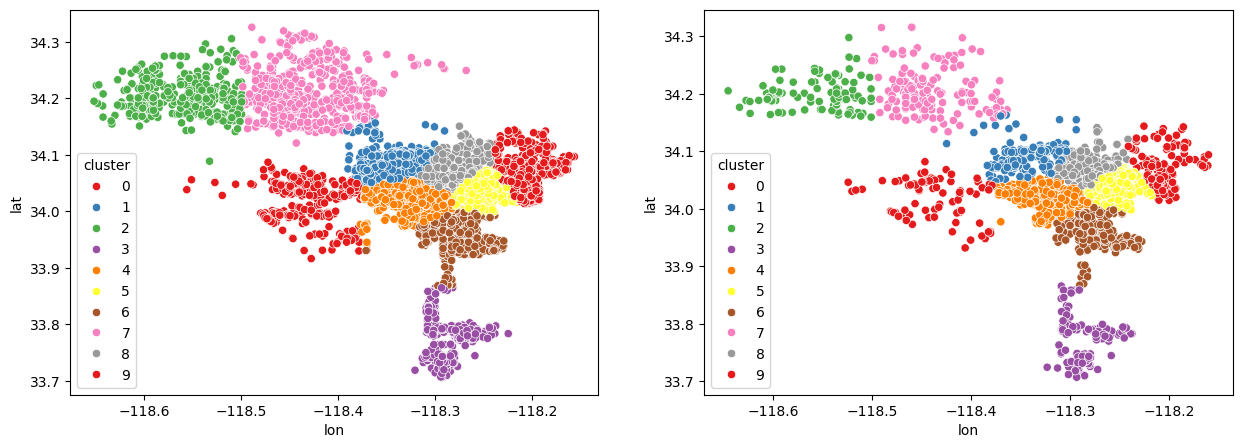

In [11]:
# Plot cluster's
fig, axis = plt.subplots(1, 2, figsize = (15,5))

sns.scatterplot(ax = axis[0], data = dat1, x = 'lon', y = 'lat', hue = 'cluster', palette='Set1')
sns.scatterplot(ax = axis[1], data = dat2, x = 'lon', y = 'lat', hue = 'cluster', palette='Set1')

plt.show()

In [12]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn_model.predict(X_train)

In [14]:
accuracy_score(y_train, y_pred)

1.0

In [15]:
y_pred_test = knn_model.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred_test)

1.0

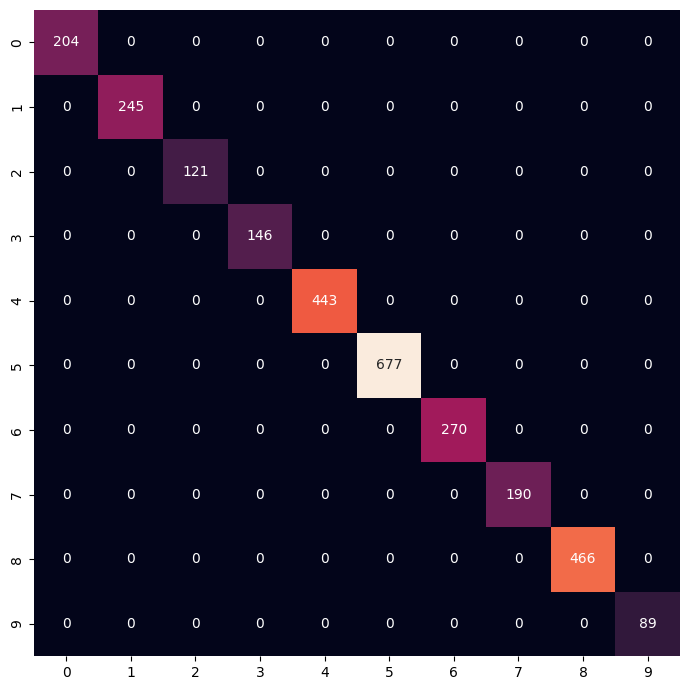

In [17]:
crime_cm = confusion_matrix(y_test, y_pred_test)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(crime_cm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [18]:
dump(knn_model, open("../models/model_robbery.pk", "wb"))

In [19]:
elementos_unicos, frecuencias = np.unique(y_pred_test, return_counts=True)

# Imprimir resultados
for elemento, frecuencia in zip(elementos_unicos, frecuencias):
    print(f"El elemento {elemento} se repite {frecuencia} veces en el array.")

El elemento 0 se repite 204 veces en el array.
El elemento 1 se repite 245 veces en el array.
El elemento 2 se repite 121 veces en el array.
El elemento 3 se repite 146 veces en el array.
El elemento 4 se repite 443 veces en el array.
El elemento 5 se repite 677 veces en el array.
El elemento 6 se repite 270 veces en el array.
El elemento 7 se repite 190 veces en el array.
El elemento 8 se repite 466 veces en el array.
El elemento 9 se repite 89 veces en el array.
